In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(16468, 14)

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


In [8]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [9]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df=pd.get_dummies(df,columns=['type'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1517 non-null   float64
 1   Date               1517 non-null   object 
 2   AveragePrice       1517 non-null   float64
 3   Total Volume       1517 non-null   float64
 4   4046               1517 non-null   float64
 5   4225               1517 non-null   float64
 6   4770               1517 non-null   float64
 7   Total Bags         1517 non-null   float64
 8   Small Bags         1517 non-null   float64
 9   Large Bags         1517 non-null   float64
 10  XLarge Bags        1517 non-null   float64
 11  year               1517 non-null   float64
 12  region             1517 non-null   object 
 13  type_conventional  1517 non-null   uint8  
 14  Year               1517 non-null   int64  
dtypes: float64(11), int64(1), object(2), uint8(1)
memory usage: 179.3+ KB


In [15]:
df.isnull().sum()

Unnamed: 0           0
Date                 0
AveragePrice         0
Total Volume         0
4046                 0
4225                 0
4770                 0
Total Bags           0
Small Bags           0
Large Bags           0
XLarge Bags          0
year                 0
region               0
type_conventional    0
Year                 0
dtype: int64

In [26]:
#data visualization

In [27]:
#distribution plot for average price

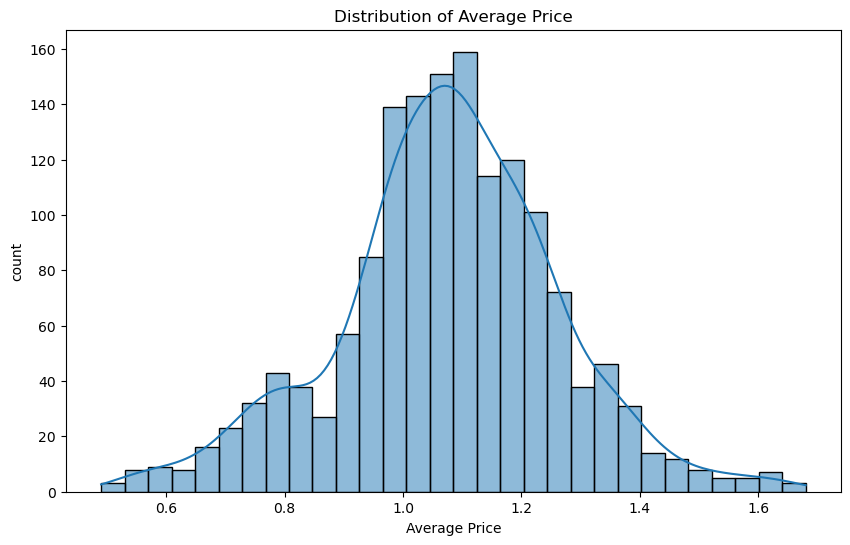

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['AveragePrice'],bins=30,kde=True)
plt.title("Distribution of Average Price")
plt.xlabel("Average Price")
plt.ylabel("count")
plt.show()

In [30]:
#Box plot of Average Price by Type

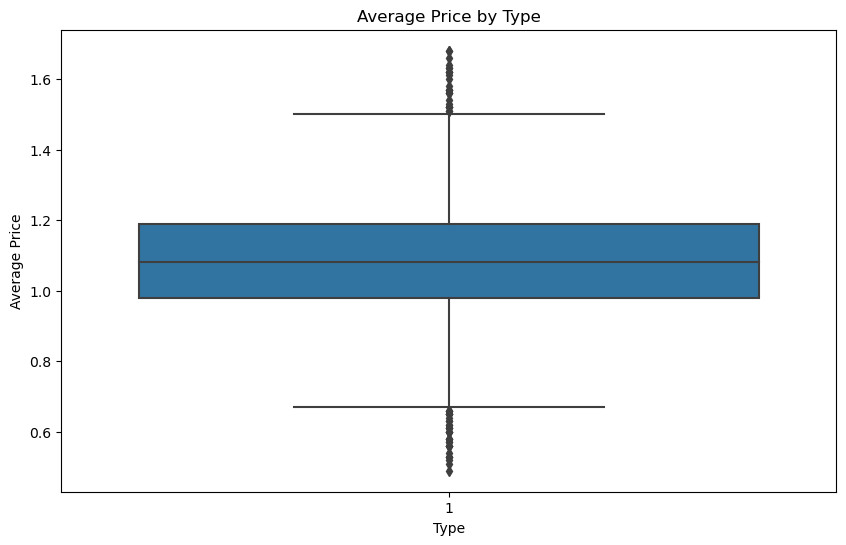

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['type_conventional'],y=df['AveragePrice'])
plt.title("Average Price by Type")
plt.xlabel("Type")
plt.ylabel("Average Price")
plt.show()

In [38]:
#Average price by Year

In [40]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

C:\Users\pramood\AppData\Local\Temp\ipykernel_5892\558394370.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [19]:
avg_price_by_year=df.groupby('Year')['AveragePrice'].mean().reset_index()

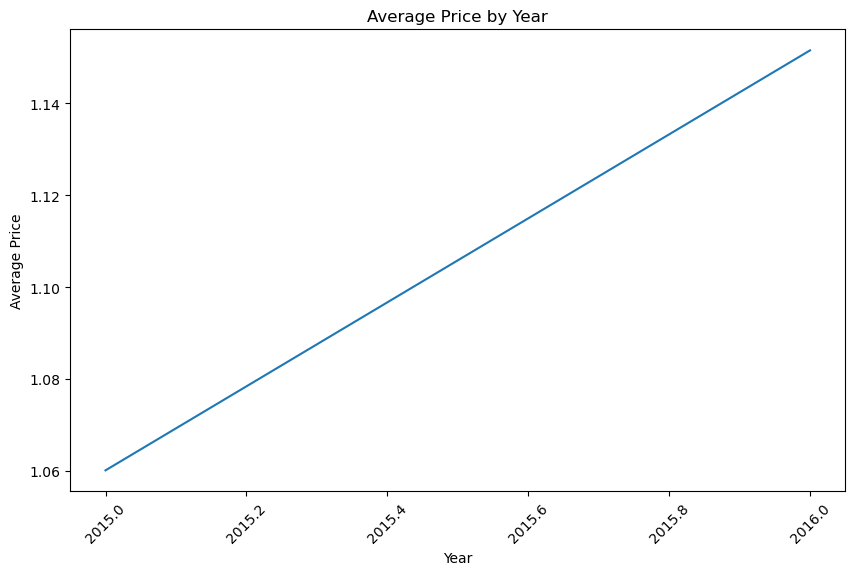

In [20]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Year',y='AveragePrice',data=avg_price_by_year)
plt.title("Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

In [43]:
#Average Price by Region

In [21]:
avg_price_by_region=df.groupby('region')['AveragePrice'].mean().reset_index()

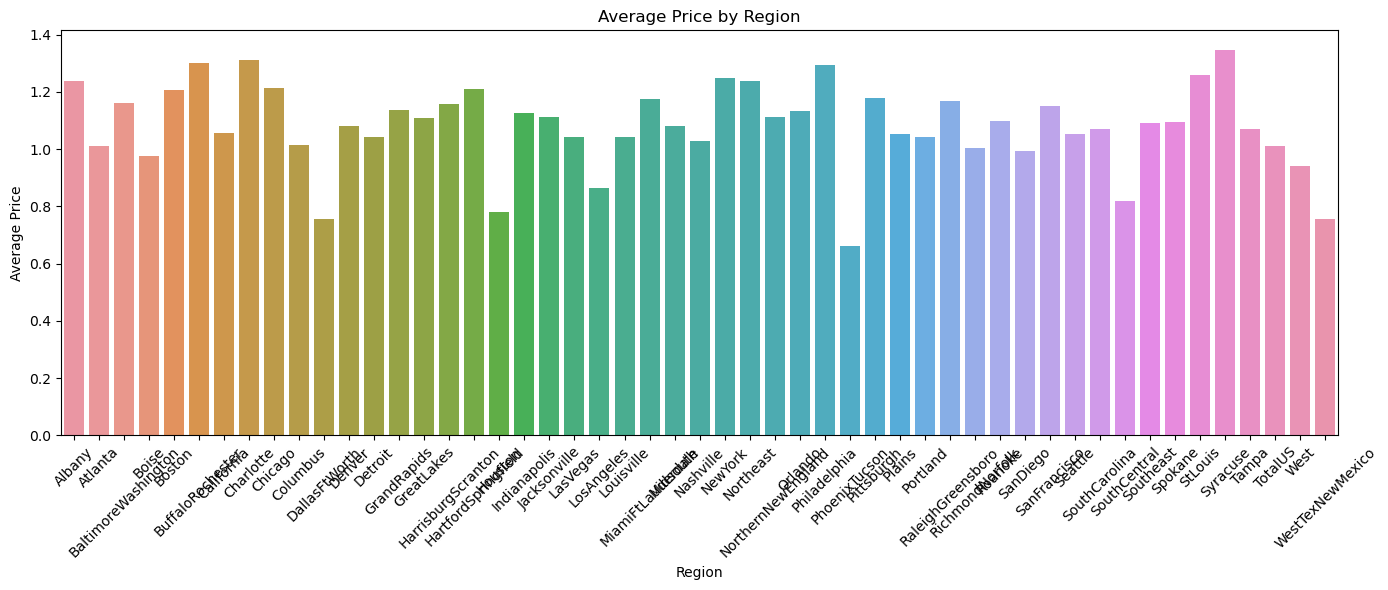

In [22]:
plt.figure(figsize=(14,6))
sns.barplot(x='region',y='AveragePrice',data=avg_price_by_region)
plt.title("Average Price by Region")
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
#Correlation heatmap

C:\Users\pramood\AppData\Local\Temp\ipykernel_5892\597897618.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


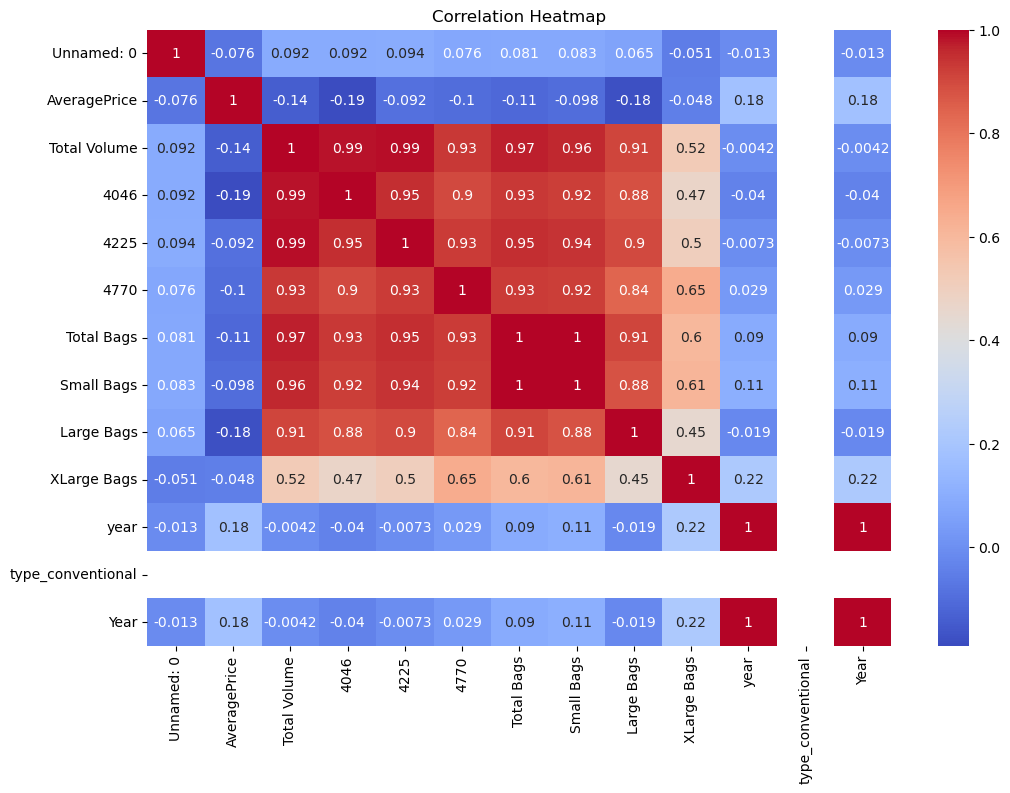

In [23]:
correlation=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [97]:
#Splitting the dataset for regression and classification task

In [24]:
df=pd.get_dummies(df,columns=['region'])

In [25]:
X_reg=df.drop(['AveragePrice','Date'],axis=1)
y_reg=df['AveragePrice']

In [42]:
X_class=df.drop(['type_conventional','Date'],axis=1)
y_class=df['type_conventional']

In [43]:
X_reg_train,X_reg_test,y_reg_train,y_reg_test= train_test_split(X_reg,y_reg,test_size=0.2,random_state=42)
X_class_train,X_class_test,y_class_train,y_class_test= train_test_split(X_class,y_class,test_size=0.2,random_state=42)

In [105]:
#regression : Training different regression model

In [32]:
reg_models={"Linear regression":LinearRegression(),"Random Forest Regression":RandomForestRegressor()}
for name, model in reg_models.items():
    model.fit(X_reg_train,y_reg_train)
    y_reg_pred=model.predict(X_reg_test)
    reg_results[name]={"MAE":mean_absolute_error(y_reg_test,y_reg_pred),"MSE":mean_squared_error(y_reg_test,y_reg_pred),"RMSE":np.sqrt(mean_squared_error(y_reg_test,y_reg_pred))}

In [33]:
for name, metrics in reg_results.items():
    print(name)
    print(metrics)
    print("\n")

Linear regression
{'MAE': 0.08077624806258514, 'MSE': 0.010995287366733013, 'RMSE': 0.10485841581262333}


Random Forest Regression
{'MAE': 0.05189375000000006, 'MSE': 0.0046768014144736945, 'RMSE': 0.06838714363441198}




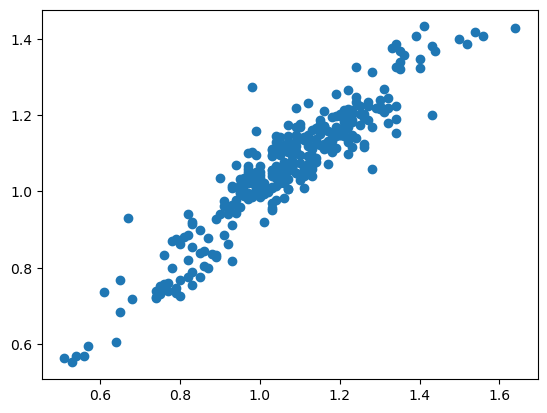

In [30]:
plt.scatter(x=y_reg_test,y=y_reg_pred)

,Test,Pred
724,1.18,1.1167
812,1.25,1.1909
1466,1.08,1.0936
1469,1.07,1.1438
51,1.22,1.2424


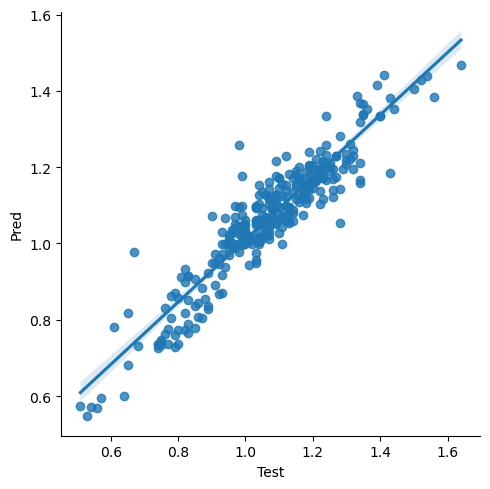

In [58]:
data = pd.DataFrame({'Test':y_reg_test , 'Pred':y_reg_pred},columns=['Test','Pred'])
sns.lmplot(x='Test',y='Pred',data=data,palette='rainbow')
data.head()

In [31]:
#in both the cases, a lower vale for MAE,MSEand RMSE indicates better model performance and from graph it is evident the models prediction is closer to the actual values. Compairing the reults Random Forest regression model has lower error values thus it has better performance compared to linear regression

In [56]:
class_models={"Decision Tree Classifier":DecisionTreeClassifier()}
for name, model in class_models.items():
    model.fit(X_class_train,y_class_train)
    y_class_pred=model.predict(X_class_test)
    accuracy=accuracy_score(y_class_test,y_class_pred)

In [57]:
print(f"{name}:\nAccuracy:{accuracy}\n")


Decision Tree Classifier:
Accuracy:1.0



,Test,Pred
724,1,1
812,1,1
1466,1,1
1469,1,1
51,1,1


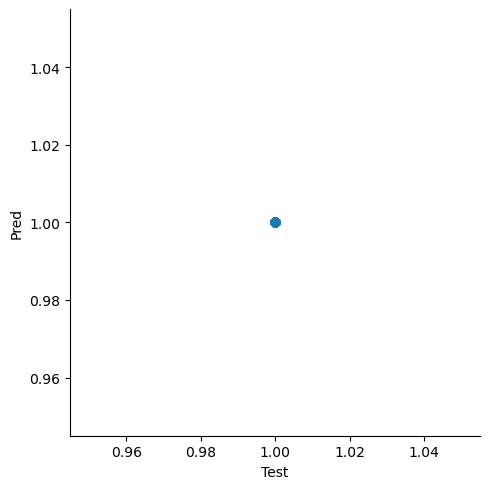

In [59]:
data = pd.DataFrame({'Test':y_class_test , 'Pred':y_class_pred},columns=['Test','Pred'])
sns.lmplot(x='Test',y='Pred',data=data,palette='rainbow')
data.head()